In [1]:
using MUST
using PyPlot
using DelimitedFiles
using PyCall

MUST.@get_help visual ;
MUST.@import_dispatch "../../../dispatch2_clean/dispatch2"
MUST.@import_dispatch "../../../dispatch2_clean/dispatch2" EOS ;

┌ Info: Precompiling MUST [78ff202f-d08f-4a78-aa4d-c8e96fa3dcb9]
└ @ Base loading.jl:1342


In [2]:
#sqEos  = MUST.SquareGasEOS(MUST.@in_dispatch("input_data/square_gas_1")) 
sqEos  = MUST.SquareGasEOS(MUST.@in_dispatch("input_data/solar_lte")) 
sqEos2 = MUST.SquareGasEOS(MUST.@in_dispatch("input_data/TSO_table_lines1_8bins")) 
sqEos3 = MUST.SquareGasEOS(MUST.@in_dispatch("input_data/test_bins")) 
sqEos4 = MUST.SquareGasEOS(MUST.@in_dispatch("input_data/test_bins_nlte")) 
leEos  = MUST.@legacyPythonEOS ;

In [3]:
save_name = "test"

"test"

In [4]:
solar_model = readdlm("solar_model.txt");

In [5]:
units = MUST.StaggerCGS();

In [6]:
emin = exp(sqEos.lnEi_axis[1])
emax = exp(sqEos.lnEi_axis[end]);

emin2 = exp(sqEos2.lnEi_axis[1])
emax2 = exp(sqEos2.lnEi_axis[end]);

In [7]:
emin3 = exp(sqEos3.lnEi_axis[1])
emax3 = exp(sqEos3.lnEi_axis[end]);

emin4 = exp(sqEos4.lnEi_axis[1])
emax4 = exp(sqEos4.lnEi_axis[end]);

In [8]:
d0 = convert(Float64, leEos.eos.scale0.min)
d1 = convert(Float64, leEos.eos.scale0.max)
e0 = convert(Float64, leEos.eos.scale1.min)
e1 = convert(Float64, leEos.eos.scale1.max)

25.441306598484516

In [9]:
t_profile   = solar_model[:,3] 
d_profile   = 10 .^(solar_model[:,end]) 
k_5_profile = solar_model[:,4];

In [10]:
e_profile_stagger = Float64[MUST.bisect(leEos,  ee=[e0, e1],       d=d_profile[i] ./units.d, T=t_profile[i]) for i in eachindex(d_profile)] .* units.ee;
e_profile_sq      = Float64[MUST.bisect(sqEos,  ee=[emin, emax],   d=d_profile[i],           T=t_profile[i]) for i in eachindex(d_profile)];
e_profile_sq2     = Float64[MUST.bisect(sqEos2, ee=[emin2, emax2], d=d_profile[i],           T=t_profile[i]) for i in eachindex(d_profile)];
e_profile_sq3     = Float64[MUST.bisect(sqEos3, ee=[emin3, emax3], d=d_profile[i],           T=t_profile[i]) for i in eachindex(d_profile)];
e_profile_sq4     = Float64[MUST.bisect(sqEos3, ee=[emin4, emax4], d=d_profile[i],           T=t_profile[i]) for i in eachindex(d_profile)];

In [11]:
k1_stagger = MUST.lookup(leEos, :K1, d_profile ./units.d, e_profile_stagger ./units.ee) .*units.rk;
k2_stagger = MUST.lookup(leEos, :K2, d_profile ./units.d, e_profile_stagger ./units.ee) .*units.rk;
k3_stagger = MUST.lookup(leEos, :K3, d_profile ./units.d, e_profile_stagger ./units.ee) .*units.rk;
k4_stagger = MUST.lookup(leEos, :K4, d_profile ./units.d, e_profile_stagger ./units.ee) .*units.rk;
t1_stagger = MUST.lookup(leEos, :T,  d_profile ./units.d, e_profile_stagger ./units.ee);


k_sq  = MUST.lookup(sqEos, :rk, d_profile, e_profile_sq);
t1_sq = MUST.lookup(sqEos, :T,  d_profile, e_profile_sq);
k1_sq = k_sq[:, 1];
k2_sq = k_sq[:, 2];
k3_sq = k_sq[:, 3];
k4_sq = k_sq[:, 4];


k_sq2  = MUST.lookup(sqEos2, :rk, d_profile, e_profile_sq2);
t1_sq2 = MUST.lookup(sqEos2, :T,  d_profile, e_profile_sq2);
k1_sq2 = k_sq2[:, 1];
k2_sq2 = k_sq2[:, 2];
k3_sq2 = k_sq2[:, 3];
k4_sq2 = k_sq2[:, 4];
k5_sq2 = k_sq2[:, 5];
k6_sq2 = k_sq2[:, 6];
k7_sq2 = k_sq2[:, 7];
k8_sq2 = k_sq2[:, 8];


k_sq3  = MUST.lookup(sqEos3, :rk, d_profile, e_profile_sq3);
t1_sq3 = MUST.lookup(sqEos3, :T,  d_profile, e_profile_sq3);
k1_sq3 = k_sq3[:, 1];
k2_sq3 = k_sq3[:, 2];
k3_sq3 = k_sq3[:, 3];
k4_sq3 = k_sq3[:, 4];
k5_sq3 = k_sq3[:, 5];
k6_sq3 = k_sq3[:, 6];


k_sq4  = MUST.lookup(sqEos4, :rk, d_profile, e_profile_sq4);
t1_sq4 = MUST.lookup(sqEos4, :T,  d_profile, e_profile_sq4);
k1_sq4 = k_sq4[:, 1];
k2_sq4 = k_sq4[:, 2];
k3_sq4 = k_sq4[:, 3];
k4_sq4 = k_sq4[:, 4];
k5_sq4 = k_sq4[:, 5];
k6_sq4 = k_sq4[:, 6];

In [12]:
s1_stagger = MUST.lookup(leEos, :S1, d_profile ./units.d, e_profile_stagger ./units.ee) .*units.m ./ units.t^3;
s2_stagger = MUST.lookup(leEos, :S2, d_profile ./units.d, e_profile_stagger ./units.ee) .*units.m ./ units.t^3;
s3_stagger = MUST.lookup(leEos, :S3, d_profile ./units.d, e_profile_stagger ./units.ee) .*units.m ./ units.t^3;
s4_stagger = MUST.lookup(leEos, :S4, d_profile ./units.d, e_profile_stagger ./units.ee) .*units.m ./ units.t^3;

s_sq  = MUST.lookup(sqEos, :src, d_profile, e_profile_sq);
s1_sq = s_sq[:, 1];
s2_sq = s_sq[:, 2];
s3_sq = s_sq[:, 3];
s4_sq = s_sq[:, 4];


s_sq2  = MUST.lookup(sqEos2, :src, d_profile, e_profile_sq2);
s1_sq2 = s_sq2[:, 1];
s2_sq2 = s_sq2[:, 2];
s3_sq2 = s_sq2[:, 3];
s4_sq2 = s_sq2[:, 4];
s5_sq2 = s_sq2[:, 5];
s6_sq2 = s_sq2[:, 6];
s7_sq2 = s_sq2[:, 7];
s8_sq2 = s_sq2[:, 8];


s_sq3  = MUST.lookup(sqEos3, :src, d_profile, e_profile_sq3);
s1_sq3 = s_sq3[:, 1];
s2_sq3 = s_sq3[:, 2];
s3_sq3 = s_sq3[:, 3];
s4_sq3 = s_sq3[:, 4];
s5_sq3 = s_sq3[:, 5];
s6_sq3 = s_sq3[:, 6];


s_sq4  = MUST.lookup(sqEos4, :src, d_profile, e_profile_sq4);
s1_sq4 = s_sq4[:, 1];
s2_sq4 = s_sq4[:, 2];
s3_sq4 = s_sq4[:, 3];
s4_sq4 = s_sq4[:, 4];
s5_sq4 = s_sq4[:, 5];
s6_sq4 = s_sq4[:, 6];

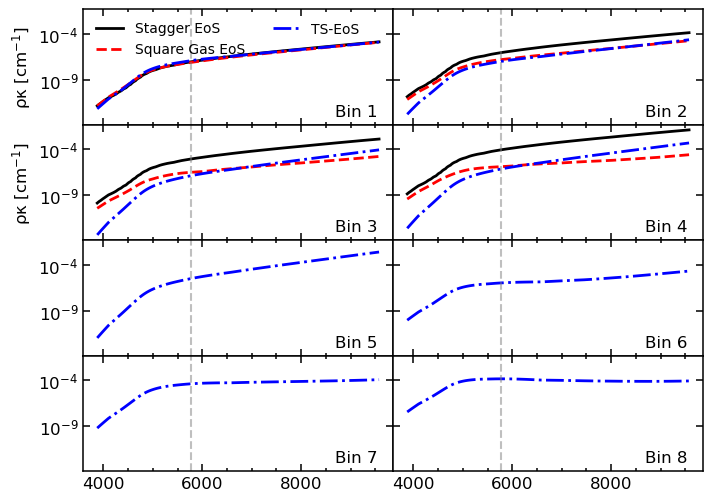

In [19]:
close("all")

f,ax = plt.subplots(4,2, figsize=(8,6), sharey=true, sharex=true)
basic_plot!.(ax)
plt.subplots_adjust(wspace=0, hspace=0)

ax[1,1].plot(t_profile, k1_stagger, color="k", lw=2, ls="-", label="Stagger EoS")
ax[1,2].plot(t_profile, k2_stagger, color="k", lw=2, ls="-")
ax[2,1].plot(t_profile, k3_stagger, color="k", lw=2, ls="-")
ax[2,2].plot(t_profile, k4_stagger, color="k", lw=2, ls="-")

ax[1,1].plot(t_profile, k1_sq,      color="r", lw=2, ls="--", label="Square Gas EoS")
ax[1,2].plot(t_profile, k2_sq,      color="r", lw=2, ls="--")
ax[2,1].plot(t_profile, k3_sq,      color="r", lw=2, ls="--")
ax[2,2].plot(t_profile, k4_sq,      color="r", lw=2, ls="--")

ax[1,1].plot(t_profile, k1_sq2,      color="b", lw=2, ls="-.", label="TS-EoS")
ax[1,2].plot(t_profile, k2_sq2,      color="b", lw=2, ls="-.")
ax[2,1].plot(t_profile, k3_sq2,      color="b", lw=2, ls="-.")
ax[2,2].plot(t_profile, k4_sq2,      color="b", lw=2, ls="-.")
ax[3,1].plot(t_profile, k5_sq2,      color="b", lw=2, ls="-.")
ax[3,2].plot(t_profile, k6_sq2,      color="b", lw=2, ls="-.")
ax[4,1].plot(t_profile, k7_sq2,      color="b", lw=2, ls="-.")
ax[4,2].plot(t_profile, k8_sq2,      color="b", lw=2, ls="-.")

#ax[1,1].plot(t_profile, 10 .^k_5_profile, color="0.5", lw=2, ls=":", label="Solar Model")
#ax[1,2].plot(t_profile, 10 .^k_5_profile, color="0.5", lw=2, ls=":")
#ax[2,1].plot(t_profile, 10 .^k_5_profile, color="0.5", lw=2, ls=":")
#ax[2,2].plot(t_profile, 10 .^k_5_profile, color="0.5", lw=2, ls=":")

ax[1,1].set_yscale("log")
ax[1,1].set_ylabel(@L_str("\\rm \\rho \\kappa\\ [cm^{-1}]"), fontsize="large")
ax[2,1].set_ylabel(@L_str("\\rm \\rho \\kappa\\ [cm^{-1}]"), fontsize="large")
ax[2,1].set_xlabel(@L_str("\\rm T\\ [K]"), fontsize="large")
ax[2,2].set_xlabel(@L_str("\\rm T\\ [K]"), fontsize="large")

ax[1,1].text(0.95,0.05,"Bin 1", transform=ax[1,1].transAxes, fontsize="large", ha="right", va="bottom")
ax[1,2].text(0.95,0.05,"Bin 2", transform=ax[1,2].transAxes, fontsize="large", ha="right", va="bottom")
ax[2,1].text(0.95,0.05,"Bin 3", transform=ax[2,1].transAxes, fontsize="large", ha="right", va="bottom")
ax[2,2].text(0.95,0.05,"Bin 4", transform=ax[2,2].transAxes, fontsize="large", ha="right", va="bottom")
ax[3,1].text(0.95,0.05,"Bin 5", transform=ax[3,1].transAxes, fontsize="large", ha="right", va="bottom")
ax[3,2].text(0.95,0.05,"Bin 6", transform=ax[3,2].transAxes, fontsize="large", ha="right", va="bottom")
ax[4,1].text(0.95,0.05,"Bin 7", transform=ax[4,1].transAxes, fontsize="large", ha="right", va="bottom")
ax[4,2].text(0.95,0.05,"Bin 8", transform=ax[4,2].transAxes, fontsize="large", ha="right", va="bottom")

for a in ax
    a.axvline(5777.0, color="0.5", ls="--", alpha=0.5)
end

ax[1].legend(framealpha=0, loc="upper left", ncol=2)
#ax[1].set_xlim(4200,9800)

f.savefig("comparison_rk_$(save_name)_eos.pdf");

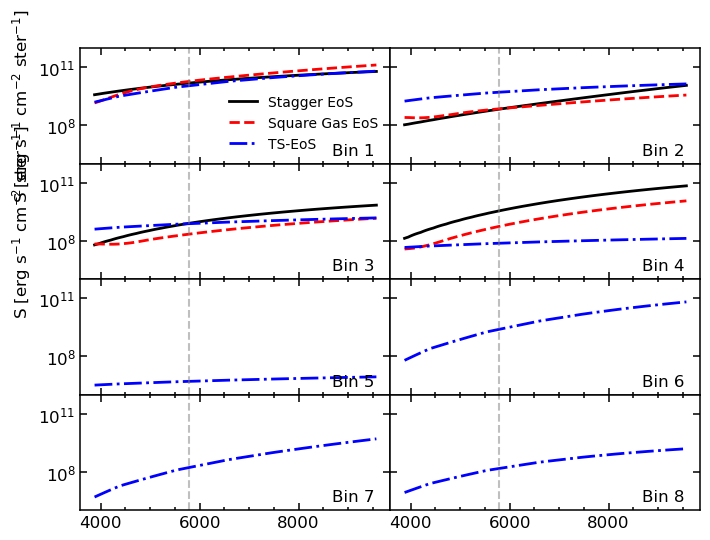

In [17]:
close("all")

f,ax = plt.subplots(4,2, figsize=(8,6), sharey=true, sharex=true)
basic_plot!.(ax)
plt.subplots_adjust(wspace=0, hspace=0)

ax[1,1].plot(t_profile, s1_stagger, color="k", lw=2, ls="-", label="Stagger EoS")
ax[1,2].plot(t_profile, s2_stagger, color="k", lw=2, ls="-")
ax[2,1].plot(t_profile, s3_stagger, color="k", lw=2, ls="-")
ax[2,2].plot(t_profile, s4_stagger, color="k", lw=2, ls="-")

ax[1,1].plot(t_profile, s1_sq,      color="r", lw=2, ls="--", label="Square Gas EoS")
ax[1,2].plot(t_profile, s2_sq,      color="r", lw=2, ls="--")
ax[2,1].plot(t_profile, s3_sq,      color="r", lw=2, ls="--")
ax[2,2].plot(t_profile, s4_sq,      color="r", lw=2, ls="--")

ax[1,1].plot(t_profile, s1_sq2,     color="b", lw=2, ls="-.", label="TS-EoS")
ax[1,2].plot(t_profile, s2_sq2,     color="b", lw=2, ls="-.")
ax[2,1].plot(t_profile, s3_sq2,     color="b", lw=2, ls="-.")
ax[2,2].plot(t_profile, s4_sq2,     color="b", lw=2, ls="-.")
ax[3,1].plot(t_profile, s5_sq2,     color="b", lw=2, ls="-.", label="TS-EoS")
ax[3,2].plot(t_profile, s6_sq2,     color="b", lw=2, ls="-.")
ax[4,1].plot(t_profile, s7_sq2,     color="b", lw=2, ls="-.")
ax[4,2].plot(t_profile, s8_sq2,     color="b", lw=2, ls="-.")

#ax[1,1].plot(t_profile, 10 .^s_5_profile, color="0.5", lw=2, ls=":", label="Solar Model")
#ax[1,2].plot(t_profile, 10 .^s_5_profile, color="0.5", lw=2, ls=":")
#ax[2,1].plot(t_profile, 10 .^s_5_profile, color="0.5", lw=2, ls=":")
#ax[2,2].plot(t_profile, 10 .^s_5_profile, color="0.5", lw=2, ls=":")

ax[1,1].set_yscale("log")
ax[1,1].set_ylabel(@L_str("\\rm S \\ [erg \\ s^{-1} \\ cm^{-2} \\ ster^{-1}]"), fontsize="large")
ax[2,1].set_ylabel(@L_str("\\rm S \\ [erg \\ s^{-1} \\ cm^{-2} \\ ster^{-1}]"), fontsize="large")
ax[2,1].set_xlabel(@L_str("\\rm T\\ [K]"), fontsize="large")
ax[2,2].set_xlabel(@L_str("\\rm T\\ [K]"), fontsize="large")

ax[1,1].text(0.95,0.05,"Bin 1", transform=ax[1,1].transAxes, fontsize="large", ha="right", va="bottom")
ax[1,2].text(0.95,0.05,"Bin 2", transform=ax[1,2].transAxes, fontsize="large", ha="right", va="bottom")
ax[2,1].text(0.95,0.05,"Bin 3", transform=ax[2,1].transAxes, fontsize="large", ha="right", va="bottom")
ax[2,2].text(0.95,0.05,"Bin 4", transform=ax[2,2].transAxes, fontsize="large", ha="right", va="bottom")
ax[3,1].text(0.95,0.05,"Bin 5", transform=ax[3,1].transAxes, fontsize="large", ha="right", va="bottom")
ax[3,2].text(0.95,0.05,"Bin 6", transform=ax[3,2].transAxes, fontsize="large", ha="right", va="bottom")
ax[4,1].text(0.95,0.05,"Bin 7", transform=ax[4,1].transAxes, fontsize="large", ha="right", va="bottom")
ax[4,2].text(0.95,0.05,"Bin 8", transform=ax[4,2].transAxes, fontsize="large", ha="right", va="bottom")

for a in ax
    a.axvline(5777.0, color="0.5", ls="--", alpha=0.5)
end

ax[1].set_ylim(1e6, 1e12)

ax[1].legend(framealpha=0, loc="lower right")
#ax[1].set_xlim(4200,9800)

f.savefig("comparison_src_$(save_name)_eos.pdf");

#gcf()